# Bigmart data

In [1]:
import pandas as pd 
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

In [3]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


both columns have null values:

Item_Weight  -   7060              
Outlet_Size   -   6113 

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [8]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [9]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [10]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [11]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [12]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

# Removing NaN values

In [13]:
# Filling the missing values of numerical data- mean

df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [14]:
# Filling the missing values of categorical data- mode

df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [15]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Feature Engineering

In [16]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace(['low fat','LF'], 'Low Fat')
df['Item_Fat_Content']= df['Item_Fat_Content'].replace(['reg','Rgulaar'], 'Regular')

In [17]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
df.skew()

C:\Users\SC\AppData\Local\Temp/ipykernel_2908/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

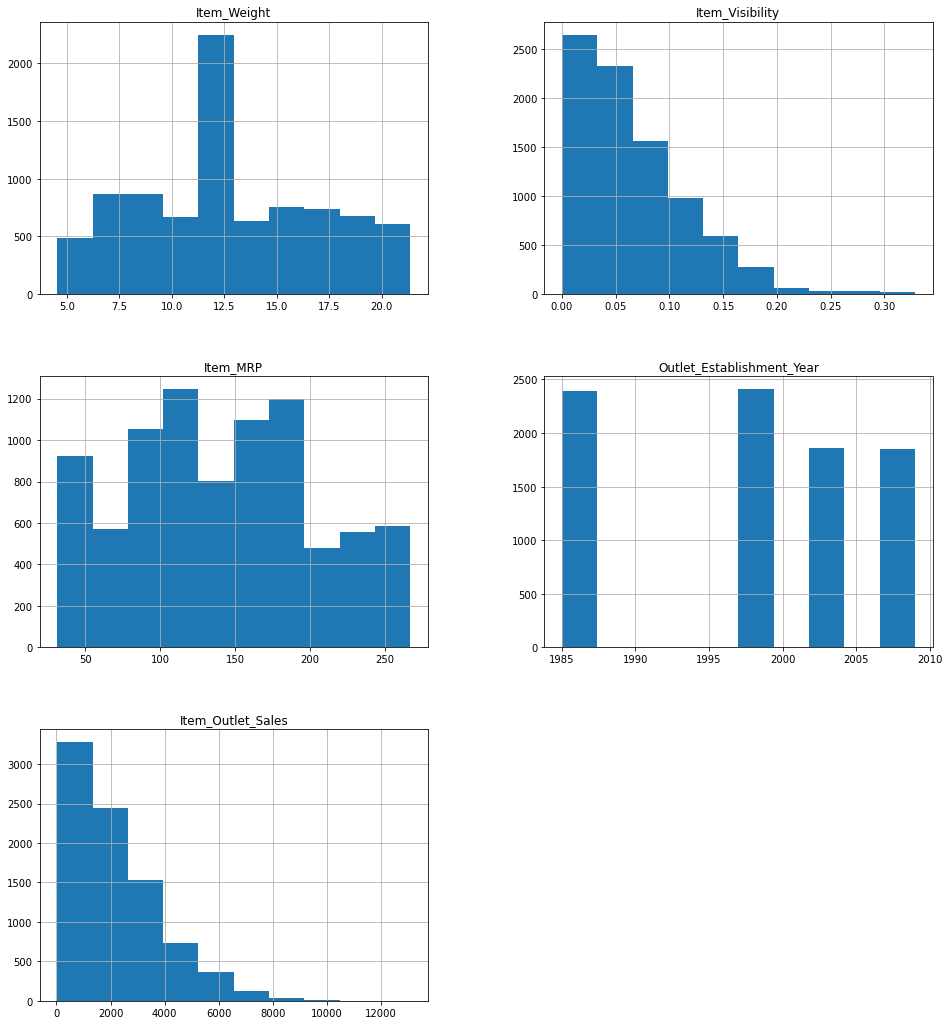

In [20]:
df.hist( layout = (3,2), figsize=(16,18),sharex= False)
plt.show()

some features are skewed

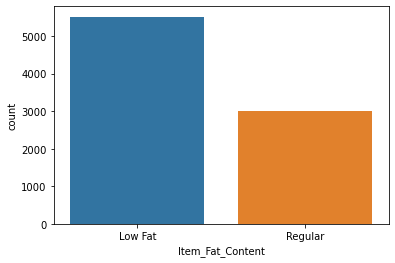

In [21]:
# categorigal attributes distribution

ax=sns.countplot(x = 'Item_Fat_Content', data =df)

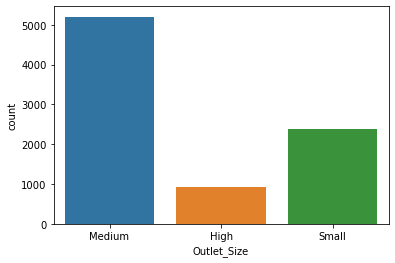

In [22]:
ax=sns.countplot(x = 'Outlet_Size', data =df)

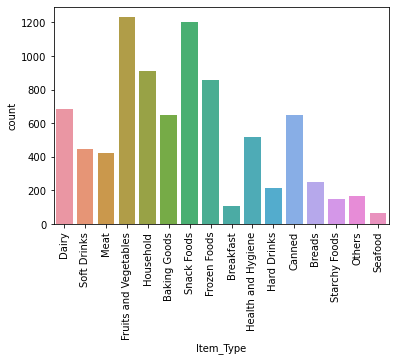

In [23]:
#plt.figure(figsize=(20,6))

col= list(df['Item_Type'].unique())
visual= sns.countplot(x= 'Item_Type', data=df)
visual.set_xticklabels(labels=col, rotation=90);

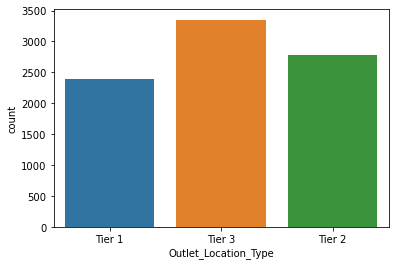

In [24]:
ax=sns.countplot(x = 'Outlet_Location_Type', data =df)

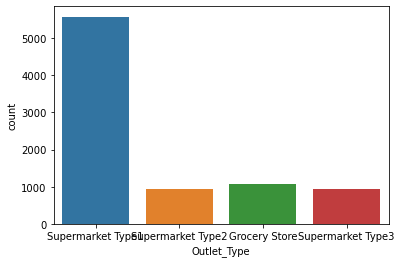

In [25]:
ax=sns.countplot(x = 'Outlet_Type', data =df)

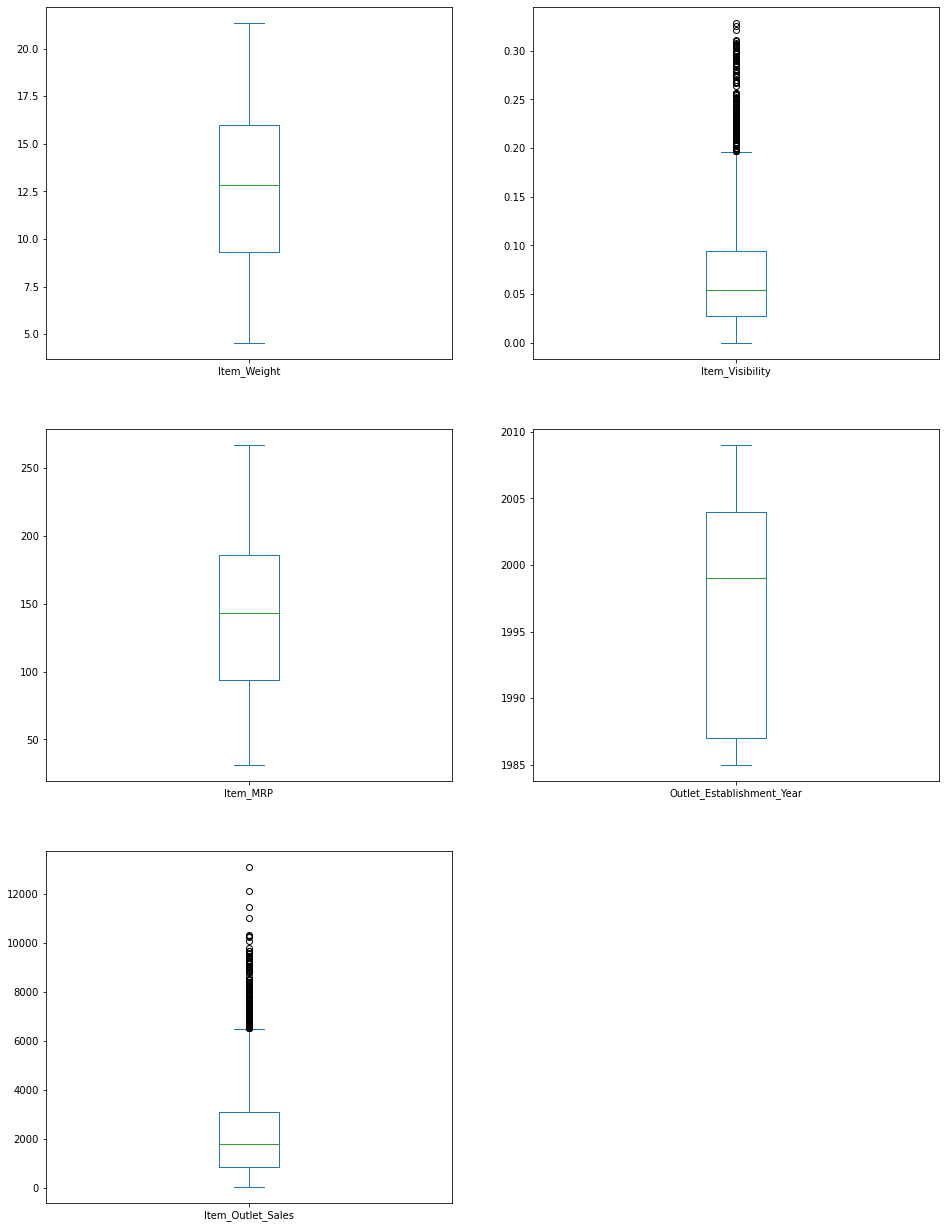

In [26]:
df.plot( kind = 'box',layout = (3,2), figsize=(16,22),sharex= False,subplots = True)
plt.show()

Item_visibility have alot of outliers

# Encoding

In [27]:
from sklearn.preprocessing import OrdinalEncoder

enc= OrdinalEncoder()

for i in df.columns:
    if df[i].dtype=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [28]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,1.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,1.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,0.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,1.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [29]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


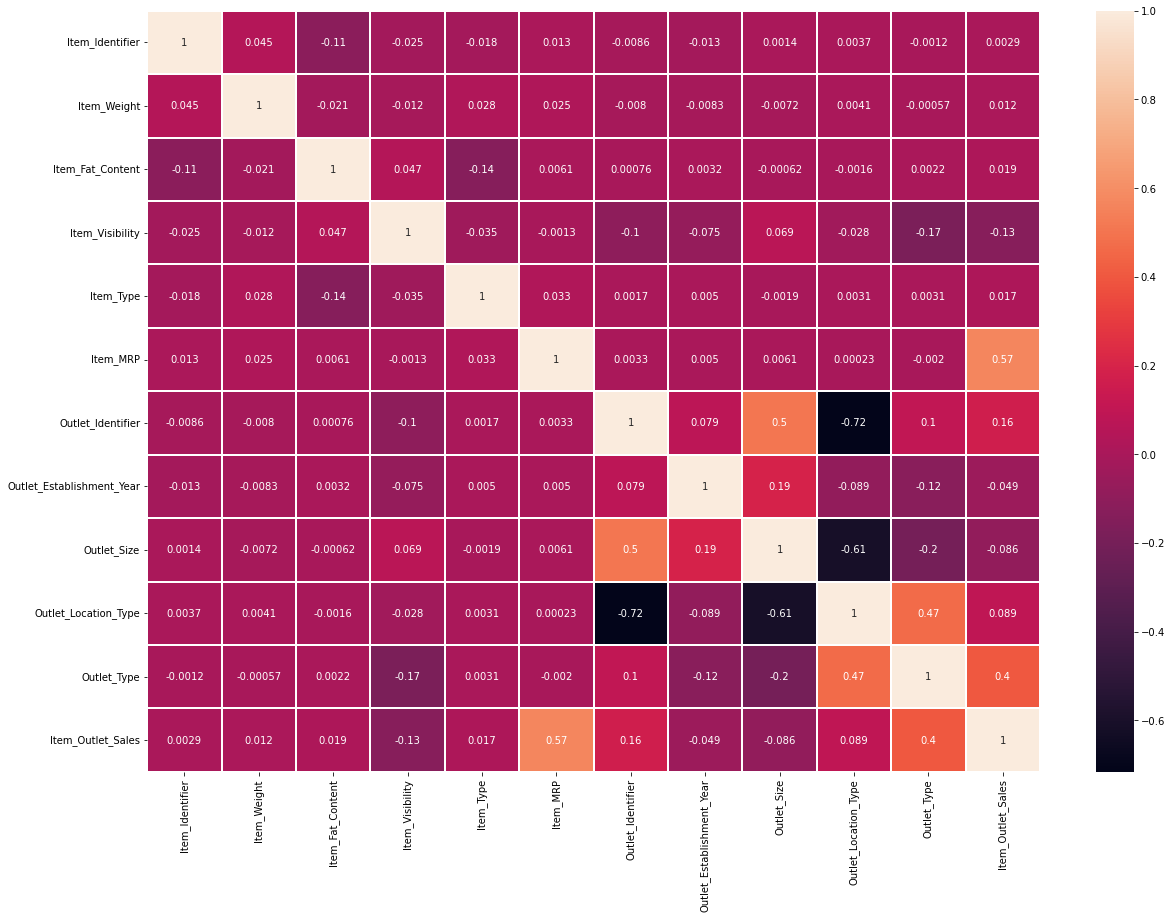

In [30]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True, linewidth=0.1)
plt.show()

In [31]:
# feature= df.drop('Item_Outlet_Sales', axis=1)
#target= df['Item_Outlet_Sales']

# Outlier Removal

In [32]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
         456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
         991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
        1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
        1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
        2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
        3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
        3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
        4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
        4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
        5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
        5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
        6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
        6886, 6903, 6993, 7005, 7016, 

In [33]:
df_new=df[(z<3).all(axis=1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,1.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,1.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,0.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,1.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [34]:
df_new.shape

(8338, 12)

In [35]:
# Percentage Loss of data

Data_loss=((8523-8338)/8523)*100
Data_loss

2.170597207556025

In [36]:
df_new.skew()

Item_Identifier             -0.007837
Item_Weight                  0.089291
Item_Fat_Content             0.620973
Item_Visibility              0.794272
Item_Type                    0.098295
Item_MRP                     0.138990
Outlet_Identifier           -0.065135
Outlet_Establishment_Year   -0.423379
Outlet_Size                 -0.087933
Outlet_Location_Type        -0.202674
Outlet_Type                  0.956727
Item_Outlet_Sales            0.878267
dtype: float64

# Sepertating the columns into features and target

In [37]:
feature=df_new.drop("Item_Outlet_Sales",axis=1)
target=df_new['Item_Outlet_Sales']

In [38]:
from sklearn.preprocessing import power_transform
feature=power_transform(feature)

feature

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


array([[-1.45970155, -0.81707423, -0.73664489, ..., -0.28760444,
        -1.37581641, -0.13467763],
       [-2.09372018, -1.72477171,  1.35750619, ..., -0.28760444,
         1.09508924,  1.05688633],
       [-0.15407347,  1.07938519, -0.73664489, ..., -0.28760444,
        -1.37581641, -0.13467763],
       ...,
       [ 1.20238359, -0.49268289, -0.73664489, ...,  1.3926764 ,
        -0.12639076, -0.13467763],
       [-0.11269957, -1.36554488,  1.35750619, ..., -0.28760444,
         1.09508924,  1.05688633],
       [-1.86156141,  0.48935138, -0.73664489, ...,  1.3926764 ,
        -1.37581641, -0.13467763]])

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
feature=sc.fit_transform(feature)
feature

array([[-1.45970155, -0.81707423, -0.73664489, ..., -0.28760444,
        -1.37581641, -0.13467763],
       [-2.09372018, -1.72477171,  1.35750619, ..., -0.28760444,
         1.09508924,  1.05688633],
       [-0.15407347,  1.07938519, -0.73664489, ..., -0.28760444,
        -1.37581641, -0.13467763],
       ...,
       [ 1.20238359, -0.49268289, -0.73664489, ...,  1.3926764 ,
        -0.12639076, -0.13467763],
       [-0.11269957, -1.36554488,  1.35750619, ..., -0.28760444,
         1.09508924,  1.05688633],
       [-1.86156141,  0.48935138, -0.73664489, ...,  1.3926764 ,
        -1.37581641, -0.13467763]])

# Training Process begins
finding best training state

In [40]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Best random state

In [41]:
lr= LinearRegression()

for i in range(0,100):
    feature_train,feature_test,target_train,target_test = train_test_split(feature,target,test_size=0.2,random_state=i)
    lr.fit(feature_train,target_train)
    pred_train = lr.predict(feature_train)
    pred_test = lr.predict(feature_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the test accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")
    
    

At random state 0,the training accuracy is:- 0.5189118786415094
At random state 0,the test accuracy is:- 0.5078206648713817


At random state 1,the training accuracy is:- 0.5153185974839531
At random state 1,the test accuracy is:- 0.5229378201658602


At random state 2,the training accuracy is:- 0.5176302303781475
At random state 2,the test accuracy is:- 0.5122608277303682


At random state 3,the training accuracy is:- 0.5213357720904417
At random state 3,the test accuracy is:- 0.49915644242604107


At random state 4,the training accuracy is:- 0.5116703659980613
At random state 4,the test accuracy is:- 0.5344184219106229


At random state 5,the training accuracy is:- 0.5196751895369723
At random state 5,the test accuracy is:- 0.5035519151481501


At random state 6,the training accuracy is:- 0.5200134752431385
At random state 6,the test accuracy is:- 0.5042319202722343


At random state 7,the training accuracy is:- 0.5201882546580858
At random state 7,the test accuracy is:- 0.5034968939

In [42]:
feature_train,feature_test,target_train,target_test = train_test_split(feature,target,test_size=0.2,random_state=77)

lr.fit(feature_train,target_train)

LinearRegression()

In [43]:
pred_test= lr.predict(feature_test)

print(r2_score(target_test,pred_test))

0.5358034384113413


In [44]:
from sklearn.model_selection import cross_val_score

scr= cross_val_score(lr, feature, target, cv=5)
print('cross validation score of Linear Regression:',scr.mean())

cross validation score of Linear Regression: 0.5149776152324883


In [45]:
from sklearn.neighbors import KNeighborsRegressor

knn =  KNeighborsRegressor(7)
knn.fit(feature_train, target_train)
pred = knn.predict(feature_test)
print('r2 score',r2_score(target_test,pred)*100)


r2 score 52.07888443935309


In [46]:
scr1= cross_val_score(knn, feature, target, cv=5)
print('cross validation score of KNeighborsRegressor:',scr1.mean())

cross validation score of KNeighborsRegressor: 0.5030246427941435


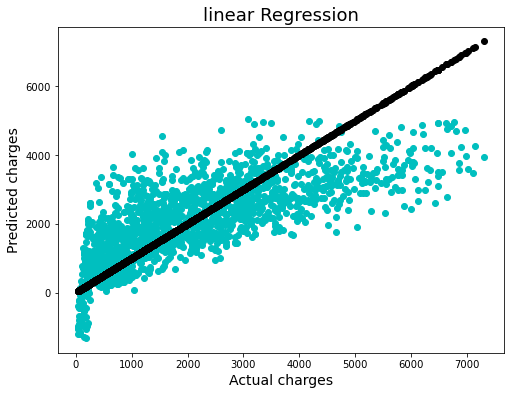

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test, y=pred_test,color='c')
plt.scatter(target_test,target_test,color='black')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('linear Regression',fontsize=18)
plt.show()